# Movie Revenue Prediction

In [38]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Load Dataset & Reshape

In [39]:
path = r'..\data\tmbd_movie_dataset.csv'
dataset = pd.read_csv(path)


movie_data = dataset.drop(columns=[
    'id', 'imdb_id', 'original_title', 'cast', 'director',
    'tagline', 'overview', 'keywords', 'genres',
    'production_companies', 'popularity_level'
])

### Log Transform

In [40]:
movie_data['log_budget'] = np.log1p(movie_data['budget'])
movie_data['log_revenue'] = np.log1p(movie_data['revenue'])

### Model Prep

In [41]:
X, y = movie_data[['log_budget', 'popularity']].values, movie_data['log_revenue'].values

### Test visualization

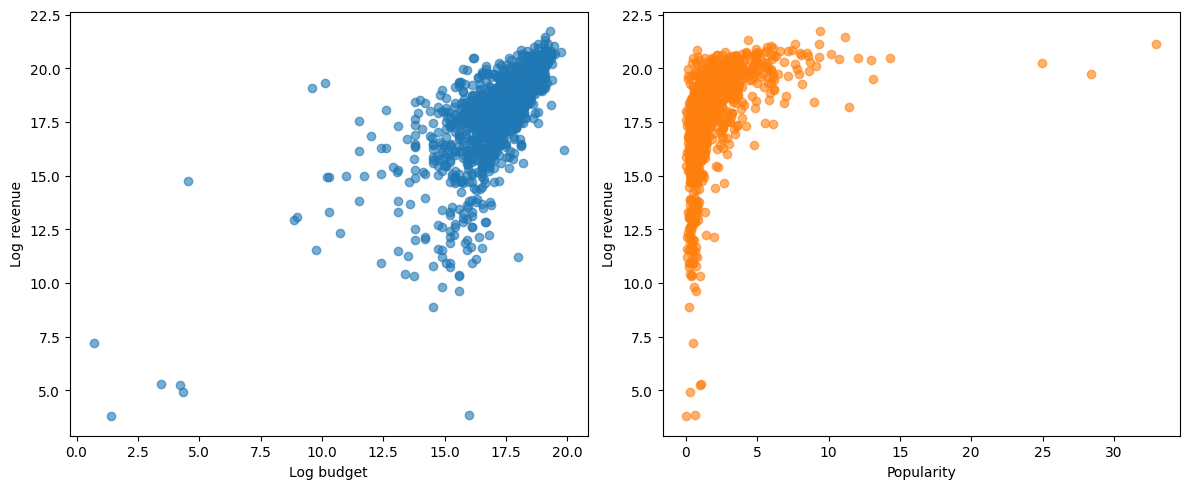

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# X[:,0] == log_budget
ax[0].scatter(X[:, 0], y, alpha=0.6)
ax[0].set_xlabel('Log budget')
ax[0].set_ylabel('Log revenue')

# X[:,1] == popularity
ax[1].scatter(X[:, 1], y, alpha=0.6, color='tab:orange')
ax[1].set_xlabel('Popularity')
ax[1].set_ylabel('Log revenue')

plt.tight_layout()
plt.show()

### Train Linear Model
1st Cell: train test split

2nd Cell: Train model with data

3rd Cell: Model evaluation

In [43]:
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2, random_state=42)

In [44]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [45]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R2 Score: {r2:.4f}')

MSE: 1.3939
RMSE: 1.1806
MAE: 0.8337
R2 Score: 0.6496


## Actual vs Predicted Values Graph

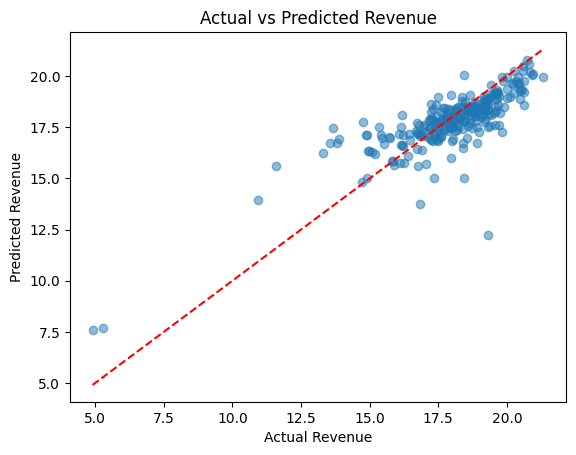

In [46]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.show()

### Movie Revenue Prediction

In [49]:
# Movie Scenarios (budget,popularity)

new_movies = np.array([
    [np.log1p(50000000), 1],
    [np.log1p(5000000), 3],
    [np.log1p(100000000), 2],
    [np.log1p(100000000), 6],
    [np.log1p(66949123), 1]
])

predicted_log_revenue = reg.predict(new_movies)

predicted_revenue = np.expm1(predicted_log_revenue)

print("Movie Predictions")
budgets = [50000000,5000000,100000000,100000000,66949123]
for i, (budget, pred_rev) in enumerate(zip(budgets,predicted_revenue)):
    print(f"${budget:,} budget → Predicted revenue: ${pred_rev:,.0f}")

Movie Predictions
$50,000,000 budget → Predicted revenue: $75,856,018
$5,000,000 budget → Predicted revenue: $19,660,140
$100,000,000 budget → Predicted revenue: $161,153,598
$100,000,000 budget → Predicted revenue: $383,325,581
$66,949,123 budget → Predicted revenue: $95,101,143
